In [1]:
import pandas as pd
import numpy as np


In [2]:
bank_data=pd.read_csv('UniversalBank.csv')

In [3]:
print(bank_data.shape)
bank_data.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,?,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_data.set_index('ID', inplace=True)

In [5]:
bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,?,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
bank_data.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
def inspect_data(data):
    return pd.DataFrame({'Type': data.dtypes, 'Levels': data.apply(lambda x: x.unique().shape[0],axis=0), 'Labels': data.apply(lambda x: str(x.unique()), axis=0)})
inspect_data(bank_data)

,Type,Levels,Labels
Age,int64,45,[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 ...
Experience,float64,45,[1.0 19.0 15.0 9.0 8.0 13.0 27.0 24.0 10.0 39....
Income,int64,162,[49 34 11 100 45 29 72 22 81 180 105 114 40 11...
ZIP Code,int64,467,[91107 90089 94720 94112 91330 92121 91711 939...
Family,object,5,[nan '3' '1' '4' '2']
CCAvg,float64,108,[1.6 1.5 1.0 2.7 0.4 0.3 0.6 8.9 2.4 0.1 3.8 2...
Education,int64,3,[1 2 3]
Mortgage,int64,347,[0 155 104 134 111 260 163 159 97 122 193 198 ...
Personal Loan,int64,2,[0 1]
Securities Account,int64,2,[1 0]


In [8]:
bank_data['Family']= bank_data['Family'].replace('?', np.nan)
bank_data.loc[bank_data['Experience']<0,'Experience']=np.nan

In [14]:
bank_data['Family']= pd.to_numeric(bank_data['Family'], errors='coerce')

In [21]:
inspect_data(bank_data)

,Type,Levels,Labels
Age,int64,45,[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 ...
Experience,float64,45,[ 1. 19. 15. 9. 8. 13. 27. 24. 10. 39. 5. 2...
Income,int64,162,[ 49 34 11 100 45 29 72 22 81 180 105 1...
ZIP Code,int64,467,[91107 90089 94720 94112 91330 92121 91711 939...
Family,float64,5,[nan 3. 1. 4. 2.]
CCAvg,float64,108,[ 1.6 1.5 1. 2.7 0.4 0.3 0.6 8....
Education,category,3,"[1, 2, 3]\nCategories (3, int64): [1, 2, 3]"
Mortgage,int64,347,[ 0 155 104 134 111 260 163 159 97 122 193 1...
Personal Loan,int64,2,[0 1]
Securities Account,int64,2,[1 0]


In [22]:
bank_data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [20]:
bank_data.Education=bank_data.Education.astype('category')

In [23]:
bank_data.Education

ID
1       1
2       1
3       1
4       2
5       2
       ..
4996    3
4997    1
4998    3
4999    2
5000    1
Name: Education, Length: 5000, dtype: category
Categories (3, int64): [1, 2, 3]

In [24]:
bank_data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [25]:
bank_data.drop('ZIP Code', axis=1, inplace=True)

In [27]:
#Decoupling Target
y=bank_data['CreditCard']
X=bank_data[bank_data.columns.difference(['CreditCard'])]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, stratify=y)

In [29]:
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [32]:
#list out numeric column
num_cols=X_train.select_dtypes(include='number').columns
print(num_cols)

Index(['Age', 'CCAvg', 'CD Account', 'Experience', 'Family', 'Income',
       'Mortgage', 'Online', 'Personal Loan', 'Securities Account'],
      dtype='object')


In [35]:
cat_cols=X_train[X_train.columns.difference(num_cols)].columns
print(cat_cols)

Index(['Education'], dtype='object')


In [36]:
#Imputation
from sklearn.impute import SimpleImputer
medianImputation=SimpleImputer(strategy='median')
medianImputation.fit(X_train[num_cols])
X_train[num_cols]=medianImputation.fit_transform(X_train[num_cols])
X_test[num_cols]=medianImputation.fit_transform(X_test[num_cols])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [37]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.fit_transform(X_test[num_cols])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [38]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

(3500, 13) (1500, 13)


In [39]:
#Alignment in case dummification leads to column mismatch
X_train, X_test=X_train.align(X_test, join='left', fill_value=0, axis=1)
print(X_train.shape, X_test.shape)

(3500, 13) (1500, 13)


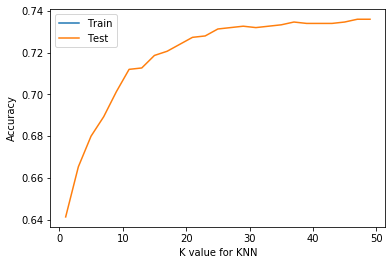

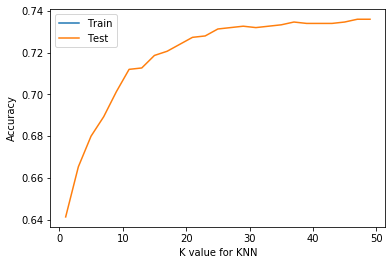

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score
%matplotlib inline

train_performance={}
test_performance={}
train_accuracy=[]
test_accuracy=[]
train_recall=[]
test_recall=[]
train_f1=[]
test_f1=[]

for k in range(1,50,2):
    knn_temp=KNeighborsClassifier(weights='distance', n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    k_train_preds= knn_temp.predict(X_train)
    k_test_preds=knn_temp.predict(X_test)
    
    train_preformance[k]=accuracy_score(y_train, k_train_preds)
    test_performance[k]=accuracy_score(y_test, k_test_preds)
    
    train_accuracy.append(knn_temp.score(X_train, y_train))
    test_accuracy.append(knn_temp.score(X_test, y_test))
    
    train_recall.append(recall_score(y_train, k_train_preds))
    test_recall.append(recall_score(y_test, k_test_preds)) 
    
    train_f1.append(f1_score(y_train, k_train_preds))
    test_f1.append(f1_score(y_test, k_test_preds))
plt.figure()
plt.plot(list(train_performance.keys()), list(train_performance.values()), label = "Train")
plt.plot(list(test_performance.keys()), list(test_performance.values()), label = "Test")
plt.xlabel("K value for KNN")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(list(train_performance.keys()), list(train_performance.values()), label = "Train")
plt.plot(list(test_performance.keys()), list(test_performance.values()), label = "Test")
plt.xlabel("K value for KNN")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt=tree.DecisionTreeClassifier(class_weight='balanced')
param_grid={'criterion': ['ginnni','entropy'],
            'max_leaf_nodes': np.arange(5,30,1),
            'min_samples_split':np.arange(0.001, 0.1, 0.001),
            'max_depth':np.arange(3,15,1),
            'min_weight_fraction_leaf': np.arange(0.01,0.25,0.005)
           }
rsearch=RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=1000, n_jobs=-1)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print('Test Accuracy',rsearch.score(X_test,y_test))

0.7414285714285714
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=29, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.048,
                       min_weight_fraction_leaf=0.034999999999999996,
                       presort='deprecated', random_state=None,
                       splitter='best')
Test Accuracy 0.742
